In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\chetr\\Documents\\class materials\\SECOND SEMESTER\\Krish_naik\\PROJECTS\\2. AQI\\Real_combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
## To see null value wrt each columns
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [5]:
df=df.dropna()

In [6]:
## Now i shall create my dependent and independent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [8]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

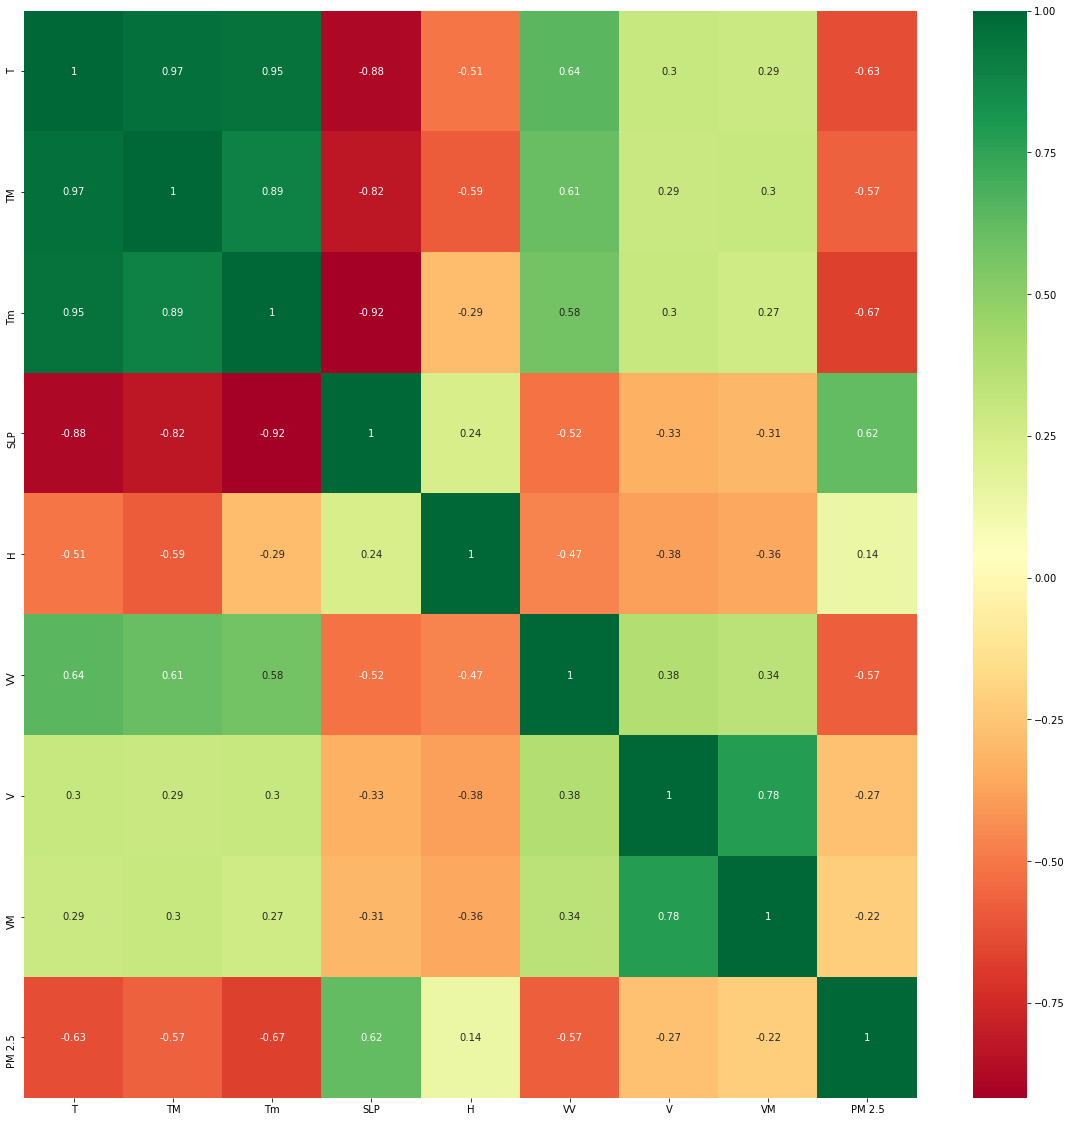

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [11]:
print(model.feature_importances_)

[0.17477945 0.11076313 0.21307273 0.14210633 0.08639645 0.17558305
 0.05498697 0.0423119 ]


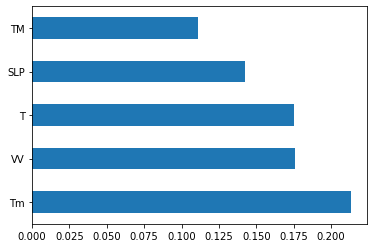

In [12]:
### Now we shall plot the graph of important features just to visualise it and i shall see top 5 important features
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\chetr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

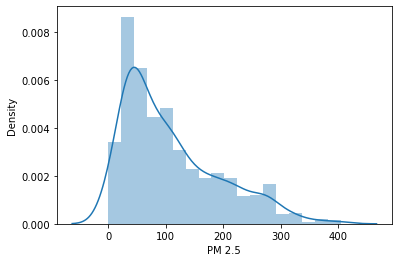

In [13]:
sns.distplot(y)

# Train Test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
import xgboost as xgb

In [16]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9997717196345083


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [18]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8123312908288712


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [20]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

In [21]:
score.mean()

0.7251276747945072

--- 

# Model Evaluation

In [23]:
prediction=regressor.predict(X_test)

C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


C:\Users\chetr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

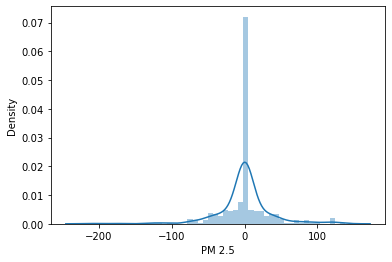

In [24]:
sns.distplot(y_test-prediction)

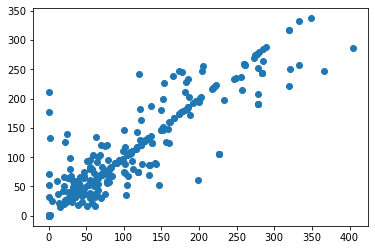

In [25]:
plt.scatter(y_test,prediction)

 --- 

# Hyperparameter Tuning

In [27]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [30]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [33]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [34]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=1000, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=6, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=6, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=6, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=6, n_estimators=500, subsample=0.6; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=6, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=1000, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=5, n_estimators=800, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=5, n_estimators=800, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=5, n_estimators=800, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=5, n_estimators=800, subsample=0.7; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=5, n_estimators=800, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=4, n_estimators=800, subsample=0.7; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=4, n_estimators=800, subsample=0.7; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=4, n_estimators=800, subsample=0.7; total time=   1.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=4, n_estimators=800, subsample=0.7; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=4, n_estimators=800, subsample=0.7; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=4, n_estimators=500, subsample=0.8; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=4, n_estimators=500, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=4, n_estimators=500, subsample=0.8; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=4, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=4, n_estimators=500, subsample=0.8; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.8; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=700, subsample=0.8; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=3, n_estimators=800, subsample=0.6; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=4, n_estimators=400, subsample=0.7; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=4, n_estimators=400, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=4, n_estimators=400, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=4, n_estimators=400, subsample=0.7; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=4, n_estimators=400, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=4, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=4, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=4, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=4, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=30, min_child_weight=4, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=3, n_estimators=1200, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=3, n_estimators=1200, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=3, n_estimators=1200, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=3, n_estimators=1200, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=30, min_child_weight=3, n_estimators=1200, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1200, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1200, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1200, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1200, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=5, min_child_weight=6, n_estimators=1200, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.6; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1000, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1000, subsample=0.6; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1000, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1000, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1000, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=400, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=400, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=400, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=400, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=400, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=1000, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=1000, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=1000, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=1000, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=7, n_estimators=1000, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=1100, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=1100, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=1100, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=1100, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=1100, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   2.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=1200, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=4, n_estimators=900, subsample=0.6; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=4, n_estimators=900, subsample=0.6; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=4, n_estimators=900, subsample=0.6; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=4, n_estimators=900, subsample=0.6; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=10, min_child_weight=4, n_estimators=900, subsample=0.6; total time=   0.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   1.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   1.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   1.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   2.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=1100, subsample=0.8; total time=   2.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=1200, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=1200, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=1200, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=1200, subsample=0.8; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=1200, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   4.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   6.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   5.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=900, subsample=0.7; total time=   2.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.6, max_depth=30, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.7; total time=   3.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.7; total time=   3.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.7; total time=   3.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.7; total time=   2.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.7; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=15, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=400, subsample=0.7; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=400, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=400, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=400, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=20, min_child_weight=6, n_estimators=400, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=600, subsample=0.6; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=600, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=600, subsample=0.6; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=600, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=4, n_estimators=600, subsample=0.6; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   2.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   2.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   2.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   2.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.7; total time=   2.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=800, subsample=0.8; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=600, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=600, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=600, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=600, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=4, n_estimators=600, subsample=0.7; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=5, n_estimators=900, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=1100, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.8; total time=   2.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.8; total time=   3.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.8; total time=   3.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.8; total time=   3.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.8; total time=   3.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=500, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=15, min_child_weight=6, n_estimators=500, subsample=0.7; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=700, subsample=0.6; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=30, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=25, min_child_weight=4, n_estimators=100, subsample=0.7; total time=   0.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=900, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=400, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=400, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=400, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=400, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=400, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=30, min_child_weight=5, n_estimators=400, subsample=0.6; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6, n_estimators=300, subsample=0.6; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=1100, subsample=0.8; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=1100, subsample=0.8; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=1100, subsample=0.8; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=1100, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=25, min_child_weight=5, n_estimators=1100, subsample=0.8; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=800, subsample=0.8; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=800, subsample=0.8; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=800, subsample=0.8; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=800, subsample=0.8; total time=   1.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=800, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.6, max_depth=5, min_child_weight=7, n_estimators=100, subsample=0.6; total time=   0.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6, n_estimators=200, subsample=0.8; total time=   0.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1200, subsample=0.7; total time=   2.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1200, subsample=0.7; total time=   2.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1200, subsample=0.7; total time=   2.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1200, subsample=0.7; total time=   2.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=1200, subsample=0.7; total time=   2.2s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=400, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=400, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=400, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=400, subsample=0.7; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=400, subsample=0.7; total time=   0.8s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=1100, subsample=0.8; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=1100, subsample=0.8; total time=   1.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=1100, subsample=0.8; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=1100, subsample=0.8; total time=   1.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4, n_estimators=1100, subsample=0.8; total time=   1.7s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.1s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   0.9s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.6; total time=   1.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.6s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.2, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   1.5s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   2.0s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=400, subsample=0.8; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=400, subsample=0.8; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=400, subsample=0.8; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=400, subsample=0.8; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.6, max_depth=20, min_child_weight=3, n_estimators=400, subsample=0.8; total time=   0.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=700, subsample=0.7; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=700, subsample=0.7; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=700, subsample=0.7; total time=   1.4s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=700, subsample=0.7; total time=   1.3s


C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=700, subsample=0.7; total time=   1.2s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   par

In [35]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [36]:
xg_random.best_score_ ## after hyperparameter tuning xgboost giving good as compared to Random_forest

-1380.5446346152435

In [38]:
predictions=xg_random.predict(X_test)

C:\Users\chetr\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


C:\Users\chetr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

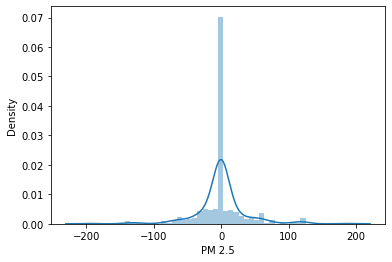

In [39]:
sns.distplot(y_test-predictions)

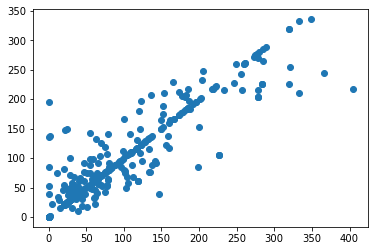

In [40]:
plt.scatter(y_test,predictions)

In [41]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.02743722623126
MSE: 1355.7081047805843
RMSE: 36.81994167269395
